**CPES Analysis**
Millie Preece

[Github repository](https://github.com/millie-preece/PROJ)

The aim of this project is to perform data analysis on the Collaborative Psychiatric Epidemiology Surverys (CPES) to better understand the distribution of depression symptoms compared with depression diagnoses in the US. CPES an open-source dataset that joins three probability samples: the National Comorbidity Survey Replication (NCS-R), the National Study of American Life (NSAL) and the National Latino and Asian American Study of Mental Health (NLAAS). The CPES was designed in recognition of the need for a high power, representative and comprehensive dataset that permits analysis of mental disorders and risk factors in the general population, with specific focus on minority groups (Alegria et al., 2015). The dataset was accessed through the [Inter-university Consortium for Political and Social Research (ICPSR) service](https://www.icpsr.umich.edu/web/ICPSR/studies/20240) (Alegria et al., 2015).

The current project will focus exclusively on the data obtained by participants carrying out a depression symptoms checklist and who provided official diagnostic labels. Given the heterogeneity of depression symptom profiles and its differential prevalence across the populations, the current study aims to detect if discrete clusters appear within the population corresponding with specific symptom groups, demographics, or other factors. Such an investigation will permit a better understanding of how depressive symptoms manifest in the population, possibly revealing more vulnerable groups. Moreover, if depressive symptoms appear across a continuum and lack distinct correspondence with diagnostic labels, this may have implications on how research addresses depression based only on those who recieve an official diagnosis. If diagnosis does not correspond with symptoms, this suggests that the prevalence rates of depression based on diagnosis rates is not an accurate reflection of the symptomatic experience of the population, which is something that should be considered in psychiatric research.

To conduct this investigation, a multiple correspondence analysis (MCA) was carried out. This is the categorical equivalent (for further discussion see [the Prince documentation](https://pythonlang.dev/repo/maxhalford-prince/)) of a PCA, which will determine principle factors that categorise the data. By reducing the data to principle components, the current study aims to identify if fewer components can classify individuals. This could be useful in a clinical setting to identify individuals based on only a few components to better identify their risk, severity and possibly most appropriate treatment option. 

Following this, the individual data points (rows) will be plotted against the components and coloured according to diagnostic and demographic factors to identify if clusters emerge depending on these factors. Given the heterogeneity of depression, it is very possible that symptoms may be disparate, but may also cluster to reveal different "sub-types". For example, previous research by Rosenstrom and Jokela (2016) using this dataset has been able to identify "lack of interest in most things" and at least four other symptoms from weight gain, weight loss, insominia, psychomotor retardation, fatigue, suicidal ideation, concentration difficulties and feelings of worthlessness as a data-drive definition of depression.


First, the modules needed for the data analysis must be imported.

In [2]:
import prince # module to compute MCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

Then, we import the data.

In [3]:
data = pd.read_csv('20240-0001-Data.tsv', sep='\t')

C:\Users\mpree\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,10,11,12,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,40,41,43,44,45,46,47,48,50,51,55,56,62,65,66,67,68,69,70,71,75,81,86,87,88,89,92,93,94,572,864,937,938,972,973,975,977,979,980,993,996,1000,1004,1006,1008,1156,1242,1266,1271,1294,1493,1494,1495,1498,1499,1500,1501,1502,1503,1508,1509,1510,1511,1512,1514,1515,1516,1517,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1590,1591,1592,1593,1594,1614,1656,1658,1662,1849,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1960,1961,1971,1972,1973,1974,1975,1976,1977,1978,1979,1981,1982,1983,1984,1985,2014,2026,2028,2029,2030,2031,2032,2040,2041,2042,2043,2045,2046,2047,2048,2064,2065,2066,2067,2069,2071,2073,2074,2077,2078,2079,2080,2083,2084,2085,2088,2094,2099,2104,2111,2120,2121,2122,2123,2124,2136,2137,2138,2139,2141,2142,2143,2144,2146,2148,2167,2203,2218,2258,2259,2288,

The raw dataset is too large to visualise in its entirety, with 20013 rows and 5543 columns. To begin to reduce the dataset to the relevant variables for this analysis, we can next select the variables to include in the MCA. The current analysis will focus on depressive symptoms, so only variables reflecting individual responses to the symptom checklist will be included.

_Note: the error message corresponds to the mixed data types of the dataframe, but this is resolved later in the code_

In [4]:
##the selected variables (responses to a depression symptom checklist) are then put in an array
selected_vars = ['V00829', 'V00830', 'V00855', 'V00845', 'V00887', 'V00891', 'V00903', 'V00906', 'V00907', 'V00908', 'V00909','V00872', 'V00874', 'V00876', 'V00886', 'V00892', 'V00888', 'V00995']
##create a subset of the data including only these variable columns
cell = data[selected_vars]
##view the first 5 entries
print(cell.head(5))


  V00829 V00830 V00855 V00845 V00887 V00891 V00903 V00906 V00907 V00908  \
0                                                                         
1                                                                         
2      1      1             5                                             
3                    1      1      1      5      1      1      1      1   
4                                                                         

  V00909 V00872 V00874 V00876 V00886 V00892 V00888 V00995  
0                                                          
1                                                          
2                                                          
3      1      1      5      5      5      1      1      1  
4                                                          


The columns now included in the data subset are coded, and correspond with the following responses in the interview:

V00829: Sad/depr episode - discouraged about life

V00830: Sad/depr episode - lost interest in enjoyable things

V00855: Sleep/energy/appetite/concentration problems

V00845: Sadness episode lasted all day for 2+ wks

V00887: Severe dep episode-trouble sleeping most nights

V00891: Severe dep episode-slept much less but not tired

V00903: Severe dep episode-lost self confidence

V00906: Severe dep episode-felt guilty most days

V00907: Severe dep episode-felt irritable/grouchy/moody most days

V00908: Severe dep episode-felt nervous or anxious most days

V00909: Severe dep episode-sudden attacks of intense fear or panic

V00872: Severe dep episode- often thought of death

V00874: Severe dep episode-would be better if dead

V00876: Severe dep episode-thought about suicide

V00886: Severe dep episode-unable to cope with daily responsibilities

V00888: Severe dep episode-alone rather than with friends/relatives

V00892: Severe dep episode-cried often

V00995: Saw professional about sadness

The individual's response is coded as a binary variable, either endorsed or not endorsed. If endorsed, the individual was experiencing the symptom at the time of the assessment.

**Cleaning the dataset**

In order to perform the MCA, the dataset must not contain any null values. When printing the first few rows of the dataframe above, we see that there are many missing values. This is because the respondants only provided data for this section of the questionnaire if they felt at some point in life they had experienced a sad episode. The following function removes null values and also responses of "I'm not sure". After cleaning the data, 2493 rows are left in the dataset. As this is a large enough number to perform the MCA, no algorithms have been applied to attempt to fill in missing data.

In [5]:
##function to clean the data
def clean_data(dataset, current_variables):
    for each in current_variables:
        dataset.drop(dataset.index[dataset[each] == ' '], inplace=True)

    #remove "dont know" answer coded as -8
    for each in current_variables:
        dataset.drop(dataset.index[dataset[each] == '-8'], inplace=True)
    
    #remove "dont know" answer coded as -9
    for each in selected_vars:
        cell.drop(cell.index[cell[each] == '-9'], inplace=True)

    return dataset


cell = clean_data(cell, selected_vars)

C:\Users\mpree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Summarising demographic information**

To get an idea of who is represented in the remaining sample, the descriptive statistics of the data is informative. The CPES includes adults aged 18 or more that resided in houses in the United States, Alaska and Hawaii, and does not include institutionalised or military persons, or those who do not speak English.

The included demographic codes represent the following variables:

V09036 - sex

V07306 - age

V08683 - income

V08172 - years of education

V08759 - marital status

V09154 - work status

V00229 - weight in pounds

The summary data tells us that the average is is 41 years (range 18-91) and the average income is 51049 USD. Most of the participants are female (N = 1591) with men representing only 34.3% of the sample (N=832). Being as the raw sample had an even sex distribution, this bias may have arisen for several reasons. Firstly, it may be that women are more likely to experience sad episodes than men (e.g. Albert, 2015), or that women are more likely to be open to reporting having had a depressive episode to the interviewer due to social prejudice relating to men and mental health. It is also important to consider that the CPES allowed only for binary categorisation of sex and does not consider gender: this is unrepresentative given the fact that transgender and non-binary individuals are disproportionately effected by poor mental health outcomes including depression (Tordoff et al., 2022).

C:\Users\mpree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2 = female, 1 = male: 2.0    1591
1.0     832
Name: V09036, dtype: int64
            V09036       V07306         V08683       V08172       V08759  \
count  2423.000000  2423.000000    2423.000000  2423.000000  2423.000000   
mean      1.656624    41.319439   51049.057780     2.531985     1.772596   
std       0.474934    14.399008   46600.794904     1.053340     0.819282   
min       1.000000    18.000000       0.000000     1.000000     1.000000   
25%       1.000000    30.000000   17500.000000     2.000000     1.000000   
50%       2.000000    40.000000   37500.000000     3.000000     2.000000   
75%       2.000000    51.000000   68636.000000     3.000000     2.000000   
max       2.000000    91.000000  200000.000000     4.000000     3.000000   

            V09154       V00229  
count  2423.000000  2423.000000  
mean      1.662815   169.407759  
std       0.905876    44.938986  
min       1.000000    -9.000000  
25%       1.000000   140.000000  
50%       1.000000   163.000000  
75% 

Text(0, 0.5, 'Age')

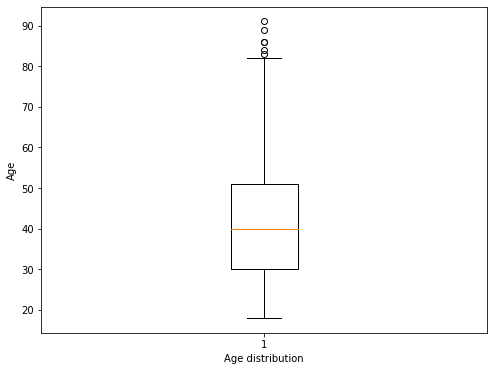

In [10]:
#list of demographic variables
just_demographic = ['V09036', 'V07306', 'V08683', 'V08172', 'V08759', 'V09154', 'V00229']
#list of demographic + symptom variables
demographicvars = ['V09036', 'V07306', 'V08683', 'V08172', 'V08759', 'V09154', 'V00229', 'V00829', 'V00830', 'V00855', 'V00845', 'V00887', 'V00891', 'V00903', 'V00906', 'V00907', 'V00908', 'V00909','V00872', 'V00874', 'V00876', 'V00886', 'V00892', 'V00888', 'V00995']

#retrieve a new dataframe containing demographic and symptom information
demo_cell = data[demographicvars]
#clean the data using the previously defined function
demo_cell = clean_data(demo_cell, demographicvars)
demo_cell = demo_cell[just_demographic]

#convert the df to float
demo_cell_float = demo_cell.astype(float)
#get number of men and women
sexratio = demo_cell_float['V09036'].value_counts()
print("2 = female, 1 = male: " + str(sexratio))
summary = demo_cell_float.describe()
print(summary)

#create boxplot to visualise age distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(demo_cell_float['V07306'])

plt.xlabel("Age distribution")
plt.ylabel("Age")

Years of education, marital status and work status have been coded in the original CPES dataset into categories. Years of education is coded as follows: 1: 0-11 years (20.3%), 2: 12 years (29.7%), 3: 13-15 years (26.4%), 4: greater than 15 years (23.6%). Marital status is coded as either married (1, 53.6%), divorced (2, 22.6%) or never married (3, 23.8%). Work status is categorised as employed (1, 65.6%), unemployed (2, 8.4%) or not in labor force (3, 25.7%). The means and standard deviations for these categories do not need to be interpretted as the variables are not continuous. The percentages are meaningful, and were provided in the original CPES dataset.

Now that we have an idea of how the sample demographics are distributed, we can plot the responses to each question on the questionnaire (represented as columns in the dataframe) to see how many people were experencing depressive symptoms at the time.

Text(0, 0.5, 'Number of responses')

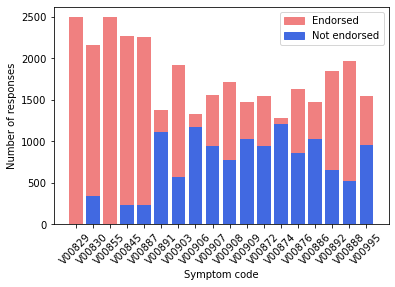

In [11]:
#list of how many people responded no to the questions
nolist2 = [0, 340, 0, 227, 237, 1113, 570, 1167, 941, 777, 1026, 948, 1210, 858, 1026, 652, 527, 949]
val_counter = -1
#display data 
for (columnName, columnData) in cell.iteritems(): #iterate through the df
    val_counter +=1
    a = cell[columnName].value_counts() #count how many people responded yes
    plt.bar(columnName, a, color='lightcoral') #plot yes responses
    plt.bar(columnName, nolist2[val_counter], color='royalblue') #plot no responses
    plt.xticks(rotation=45)
    
#create legend and plot axis labels
endorsed_patch = mpatches.Patch(color='lightcoral', label='Endorsed')
notendorsed_patch = mpatches.Patch(color='royalblue', label='Not endorsed')
plt.legend(handles=[endorsed_patch, notendorsed_patch])
plt.xlabel("Symptom code")
plt.ylabel("Number of responses")

We see that within this sample, a large proportion of people often responsed "yes" (endorsement) to experiencing the depressive symptoms. In fact, all respondants had felt discouraged about life and had sleep, energy, appetitite or concentration problems as a result whilst going through a sad/depressive episode. The least endorsed symptoms were "feeling better if dead" and "feeling guilty most days". It should be considered that the sub-sample of the CPES that answered these questions had previously reported having experienced at least one sad episode in their life. Given that not all respondents answered these questions, this data cannot be extrapolated to the entire population.

It might also be useful to understand correlations between these symptoms. We see below that many symptoms are correlated with eachother. Interestingly, we do not see a correlation between an episode lasting more than two weeks and feelings of being better if dead. Suicidal ideation did however correspond with sleep problems, loss of self confidence and loss of interest in enjoyable things. This could suggest that it is severity of an episode as opposed to length that corresponds with suicidal ideation.

In [12]:
#function to calculate p values between variables using pearson's r
def get_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues


#check correlations
#first make sure the df type is float so the correlation works
def check_corr(data_to_corr):
    cell_asfloat = cell.astype(float)
    check_corr_df = cell_asfloat.corr(method='pearson')
    pval = get_pvalues(cell_asfloat)
    return check_corr_df, pval

corr_df, p = check_corr(cell)
print(p)

       V00829  V00830 V00855  V00845  V00887  V00891  V00903  V00906  V00907  \
V00829    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
V00830    NaN     0.0    NaN  0.0146     0.0  0.1211     0.0     0.0     0.0   
V00855    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
V00845    NaN  0.0146    NaN     0.0  0.4171  0.5146  0.1796  0.9179  0.4146   
V00887    NaN     0.0    NaN  0.4171     0.0     0.0  0.0063     0.0     0.0   
V00891    NaN  0.1211    NaN  0.5146     0.0     0.0  0.0937  0.1066  0.0984   
V00903    NaN     0.0    NaN  0.1796  0.0063  0.0937     0.0     0.0     0.0   
V00906    NaN     0.0    NaN  0.9179     0.0  0.1066     0.0     0.0     0.0   
V00907    NaN     0.0    NaN  0.4146     0.0  0.0984     0.0     0.0     0.0   
V00908    NaN     0.0    NaN  0.3477     0.0     0.0     0.0     0.0     0.0   
V00909    NaN     0.0    NaN  0.4432     0.0  0.0024     0.0     0.0     0.0   
V00872    NaN     0.0    NaN  0.9634    

C:\Users\mpree\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Having cleaned and described the data, the MCA can now be carried out.

The dataset used has 18 columns (variables). We see below that 13 components are needed to explain 90% of the variance in the data. The eigenvalues however are very low beyond the first component, meaning the scheme produced is not robust. When reduced to 5 components, 51% of the variance in the data can be explained.
For visualisation purposes, the MCA has been plotted with just 2 components, explaining 29% of the data. The eigen value is highest for the first component, alone explaining 20%. 

Although no clear clustering emerges, we do see in analysing the positions of the variables that the 1st component appears to separate endorsed variables compared to non-endorsed variables.

[0.21593305788148395, 0.08688195081633124]
0.3028150086978152
[0.1919404958946524, 0.07722840072562777]


ZeroDivisionError: integer division or modulo by zero

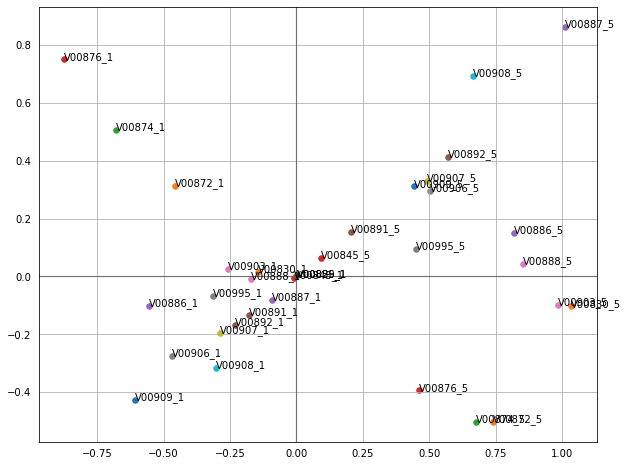

In [19]:
#randomly split dataset to two subsets; one for training, one for testing
def test_train(data_to_split):
    x_train, x_test = train_test_split(data_to_split, test_size=0.25, shuffle=True, random_state=10) #to allow reproducibility
    return x_train, x_test

x_train, x_test = train_test_split(cell, test_size=0.25, shuffle=True)
#test_train(cell)

mc = prince.MCA(n_components=2).fit(x_test)
fig, ax = plt.subplots(figsize=(10, 8))
inertia = mc.explained_inertia_
p_coords = mc.row_coordinates(X=x_test)
eigen = mc.eigenvalues_
print(inertia) 
print(sum(inertia))
print(eigen)
mc.plot_coordinates(X=x_test, ax=ax, legend_n_cols=0, show_column_labels=True, show_row_points=False) 




From the MCA plot, we can see that some variables lay at opposite ends on the y-axis component. For example, "Often thinking of death" is not similar to "loss of self confidence", "lost interest in enjoyable things" and "alone rather than with friends/relatives" for non-endorsed responses. It is not immediately clear at this point in the analysis what the position along the y axis explains.

However, all the variables are more clustered for the endorsed responses (around point (0,0)). This may suggest that endorsed symptoms are more similar to one another than non-endorsed symptoms. Some distinct endorsed variables are 876: "thought about suicide", and 874: "would be better if dead", which are closely positioned, and possibly in their own cluster, not too far from 872: "other thought of death" in the upper left quadrant. The fact that these variables are related is not suprising, and possibly represents the most severe symptom profile in need of most attention (suicidal ideation). Arguably, it also suggests that suicidal ideation prehaps represents a distinct subset of symptoms separate to the others, which cluster more closely together.

To assess the output of the MCA analysis, the percentage variance can be plotted for each component. Using the "elbow point" often applied to PCA, it is appropriate to determine to continue the analysis with just component 1 and 2. The elbow point describes how many components to include by drawing a straight line from component 1-13, and selecting the component that corresponds with the longest distance from this line.

Text(0, 0.5, 'Percentage variance explained')

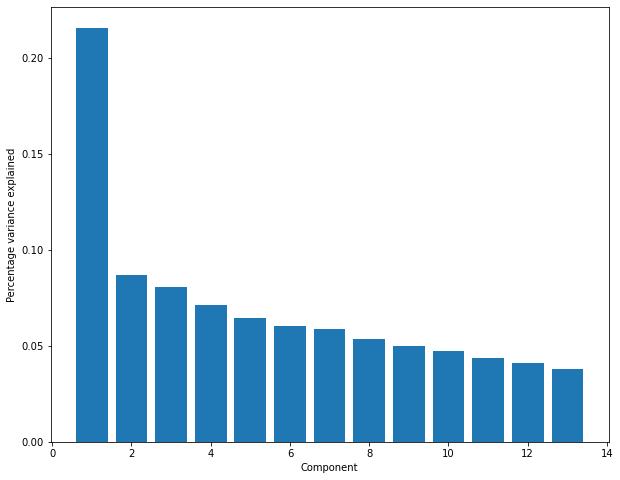

In [20]:
#plotting 13 components
mc = prince.MCA(n_components=13).fit(x_test)
inertia = mc.explained_inertia_

fig2, ax2 = plt.subplots(figsize=(10, 8))
component_label = np.linspace(1, len(inertia), num=13)
plt.xlim=([1, 13])
plt.bar(component_label, inertia)
plt.xlabel("Component")
plt.ylabel("Percentage variance explained")


The MCA analysis plots the variables across the 2 reduced dimensions. We can instead however plot the rows (individuals). If we classify individuals as either having had an MDD diagnosis at some point or not, we would expect to possibly see some clustering based on the two principle components (as the x component appears to correspond with having a symptom or not).

C:\Users\mpree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


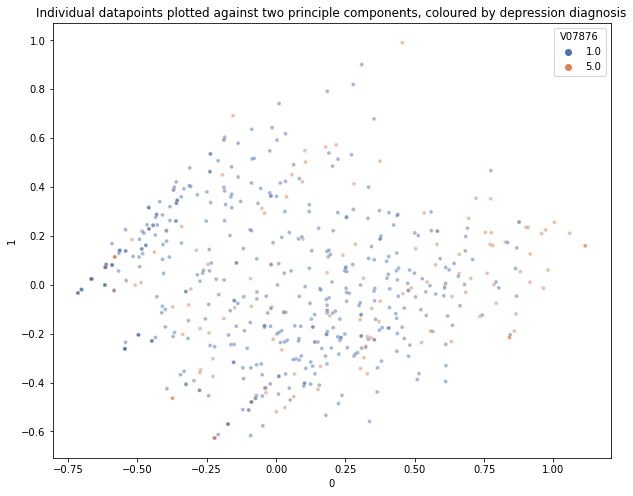

C:\Users\mpree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-23-e96610e88e22>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_with_sum[each] = cell_with_sum[each].apply(recode_for_sum)
<ipython-input-23-e96610e88e22>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

6        11.0
9        12.0
11       12.0
24       15.0
36       15.0
         ... 
19908    12.0
19916     9.0
19936    11.0
19978    15.0
19994    13.0
Name: sum, Length: 2497, dtype: float64


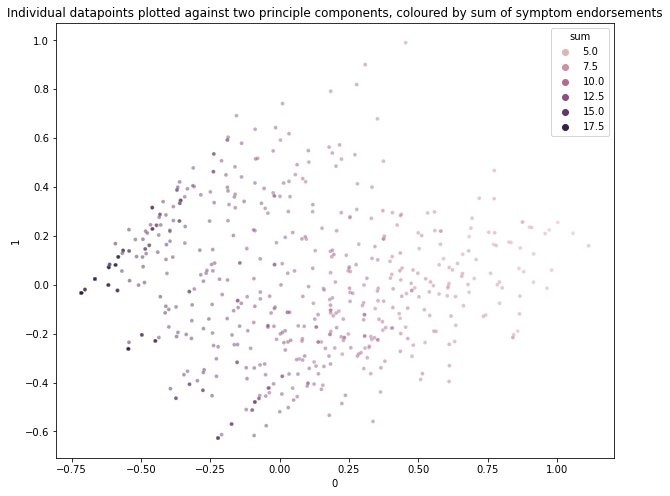

In [23]:

##create new subset that includes MDD diagnostic information 
new_selected_vars = ['V00829', 'V00830', 'V00855', 'V00845', 'V00887', 'V00891', 'V00903', 'V00906', 'V00907', 'V00908', 'V00909','V00872', 'V00874', 'V00876', 'V00886', 'V00892', 'V00888', 'V00995', 'V07876']
#diagnosis = data['V07876'] (either endorsed or not endorsed having a diagnosis)
new_cell = data[new_selected_vars]
new_cell = clean_data(new_cell, new_selected_vars)

#plot each person on the previous MCA axis
new_cell = new_cell.astype(float) #convert df to float

joined_df = new_cell.join(p_coords) #join the df's together so variable info and x and y coords together
groups = joined_df.groupby('V07876') #group by diagnosis

#plot coordinates and colour by diagnosis
fig4, ax4 = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=joined_df, x=joined_df[0], y=joined_df[1], hue='V07876', palette='deep', legend=True, alpha=0.5, s=15)
plt.title("Individual datapoints plotted against two principle components, coloured by depression diagnosis")
plt.show()


col_list = ['V00829', 'V00830', 'V00855', 'V00845', 'V00887', 'V00891', 'V00903', 'V00906', 'V00907', 'V00908', 'V00909','V00872', 'V00874', 'V00876', 'V00886', 'V00892', 'V00888', 'V00995']
# new df containing just these columns
cell_with_sum = data[col_list]
cell_with_sum = clean_data(cell_with_sum, col_list)

def recode_for_sum(d):
    if d == '1':
        return 1
    if d == '5':
        return 0
    
#recode data
for each in col_list:
    cell_with_sum[each] = cell_with_sum[each].apply(recode_for_sum)

#count how many symptoms endorsed by each person
cell_with_sum['sum'] = cell_with_sum[col_list].sum(axis=1)
print(cell_with_sum['sum'])


cell_with_sum = cell_with_sum.astype(float)

joined_sum = cell_with_sum.join(p_coords)
groups2 = joined_sum.groupby('sum')

fig3, ax3 = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=joined_sum, x=joined_sum[0], y=joined_sum[1], hue='sum', legend=True, alpha=0.5, s=15)
plt.title("Individual datapoints plotted against two principle components, coloured by sum of symptom endorsements")
plt.show()




We see that in fact there is no clear separation according to the dimensions produced by the MCA based on diagnostic label. An interpretation of this result is that many people experience symptoms and thus diagnosis is not reflective of the experience of symptoms across the population as many people perhaps don't seek help, for example. There is perhaps a slight left-skew of those who are depressed, but it is unclear. This makes sense given the fact that the x-axis principle appears to separate symptom endorsement, with those on the left representing those who endorsed depressive symptoms. However, some people who report having or having had a diagnosis lay on the right hand side of this principle, suggesting that there is overlap between symptom experience and diagnosis, with no clear depression profile appearing. Furthermore, the DSM-V requires the prevalence of several symptoms at once for a diagnosis of Major Depressive Disorder (MDD). Given that the MCA does not show the amount of symptoms endorsed by an individual, it is not possible to determine if some of the left-skewed individuals are sub-clinical for this reason. The dataset records lifetime endorsements, meaning it is not possible to separate the points given the respondant's current symptom profile. This arguably would be more informative.

When we colour the plot based on number of symptoms endorsed however, a much more interesting pattern emerges. We see that those who endorsed the most symptoms (darkest purple) are on the left-most side of the graph, and those with the least are on the right-most side of the graph. This supports the interpretation that the x-axis component corresponds to explaining the endorsement of symptoms. We must consider however that when coloured by diagnosis, some individuals with between 5-10 symptoms are diagnosed, whilst others with 10-17 symptoms are not diagnosed. Hence, whilst the MCA has provided a component that separates individuals based on number of symptom endorsements, this does not correspond with diagnosis. This suggests there may be many individuals in the population who have many symptoms and no diagnosis, suggesting that clinical services may not be helping everyone in need. Given the data is from the states where mental health care carries a substantial cost, it should be further investigated if this is a social issue.

The results are interesting as they demonstrate that a current or former diagnostic label does not directly correspond with symptom experiences. Many individuals without a diagnosis may have had depressive episodes, and equally many people with a diagnosis may only experience a subset of symptoms (although, the MCA does not reveal a specific subset).

The analysis of this data demonstrated that a key component when addressing depressive symptoms is number of symptoms, but that this does not necessarily relate to diagnosis. This therefore addresses the goal of the report, confirming the heterogeneity of the condition and the gaps in diagnoses. The results from this report support the notion that psychiatric research that utilises samples only with diagnoses may not be representing the experience of depressive symptoms across the population.

**References:**

Albert P. R. (2015). Why is depression more prevalent in women?. Journal of psychiatry & neuroscience : JPN, 40(4), 219–221. https://doi.org/10.1503/jpn.150205

Alegria, Margarita, Jackson, James S., Kessler, Ronald C., and Takeuchi, David. Collaborative Psychiatric Epidemiology Surveys (CPES), 2001-2003 [United States]. Inter-university Consortium for Political and Social Research [distributor], 2016-03-23. https://doi.org/10.3886/ICPSR20240.v8

Rosenstrom, T. & Jokela, M. (2016). Reconsidering the definition of Major Depression based on Collaborative Psychiatric Epidemiology Surveys, Journal of Affective Disorders. http://dx.doi.org/10.1016/j.jad.2016.09.014

Tordoff DM, Wanta JW, Collin A, Stepney C, Inwards-Breland DJ, Ahrens K. Mental Health Outcomes in Transgender and Nonbinary Youths Receiving Gender-Affirming Care. JAMA Netw Open. 2022;5(2):e220978. doi:10.1001/jamanetworkopen.2022.0978